## Homework 1

#### Given a set of blue points, calculate the parameters of the fitted quadratic curve using the gradient descent method.

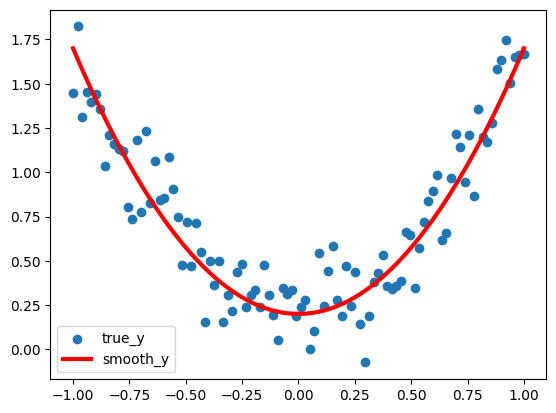

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
y = 1.5*x*x + 0.2 + 0.2*np.random.randn(100)
plt.scatter(x, y)
plt.plot(x, 1.5*x*x + 0.2, 'r-', lw=3)
plt.legend(['true_y','smooth_y'])
plt.show()

iteration 0, error is 0.7594


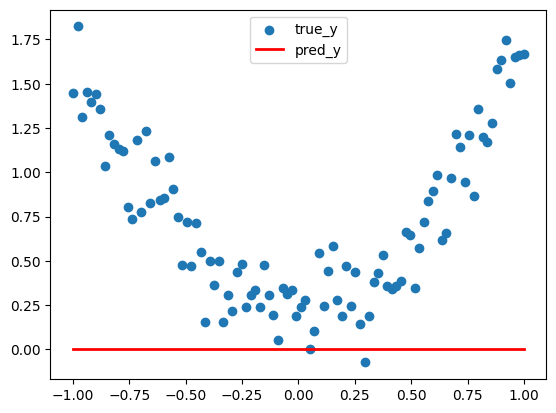

iteration 250, error is 0.0383


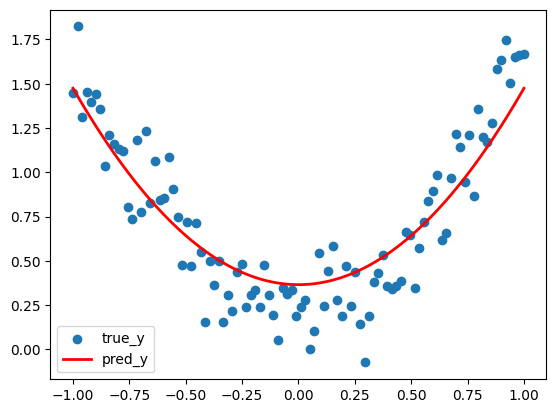

iteration 500, error is 0.0278


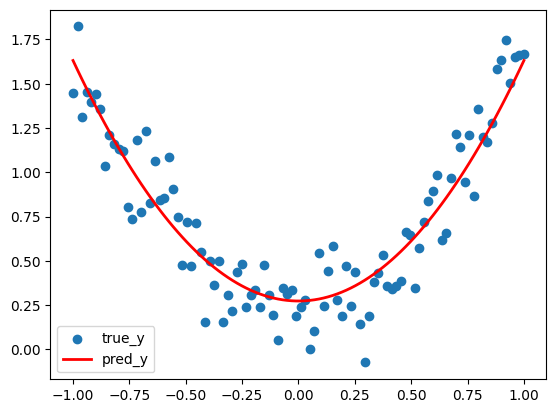

iteration 750, error is 0.0269


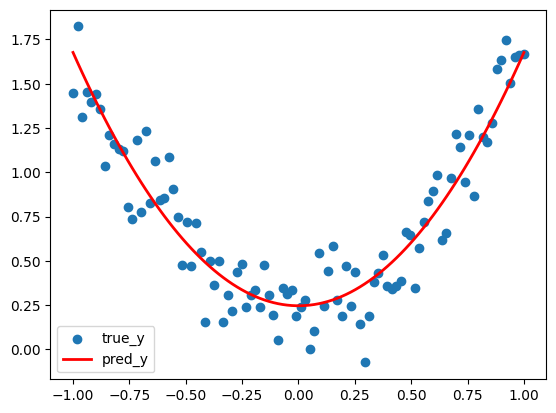

iteration 1000, error is 0.0268


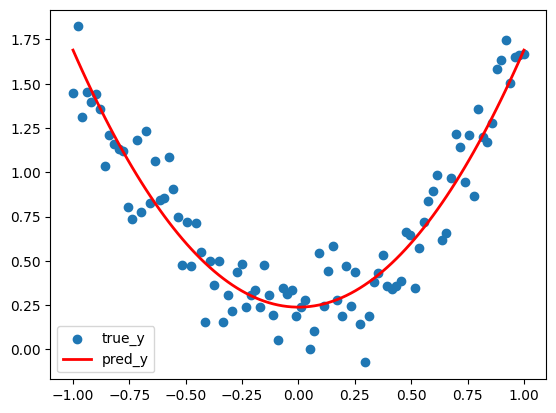

b = 0.2382, w = 1.4518


In [2]:
def step_gradient(b_current, w_current, points, learningRate):
    x = points[:, 0]
    y = points[:, 1]   
    
    N = float(len(points))
    b_gradient = np.sum(-(2/N)*(y - ((w_current * x) + b_current)))
    w_gradient = np.sum(-(2/N)*x * (y - ((w_current * x) + b_current)))

    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)
    return [new_b, new_w]

learning_rate = 0.03
b = 0
w = 0
num_iterations = 1001
points = np.zeros((100, 2))
points[:,0] = x**2
points[:,1] = y

for i in range(num_iterations):
    if i % 250 == 0:
        print('iteration %d, error is %.4f' % (i, np.mean((y - (w * x**2 + b)) ** 2)))
        
        plt.scatter(x, y)
        plt.plot(x, w*x**2 + b , 'r-', lw=2)
        plt.legend(['true_y','pred_y'])
        plt.show()
        
    b, w = step_gradient(b, w, points, learning_rate)
        
print("b = %.4f, w = %.4f" % (b, w))

## Homework 2

#### 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()

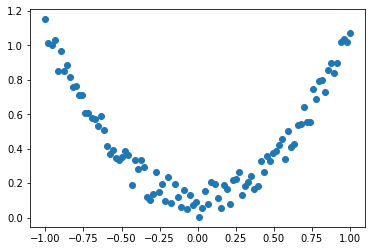

In [1]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())       
plt.scatter(x.numpy(), y.numpy())
plt.show()

Net(
  (linear1): Linear(in_features=1, out_features=20, bias=True)
  (active): Sigmoid()
  (linear2): Linear(in_features=20, out_features=1, bias=True)
)


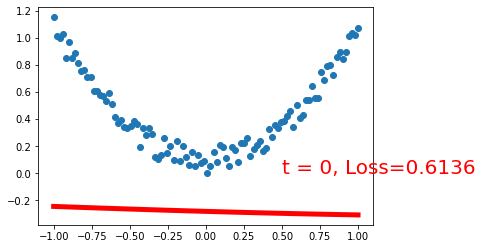

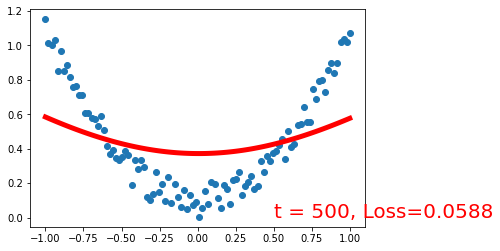

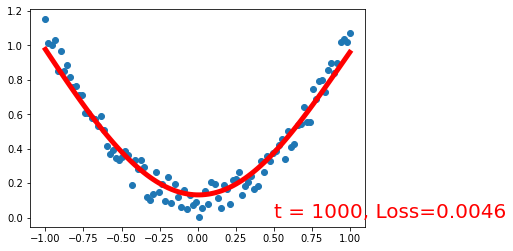

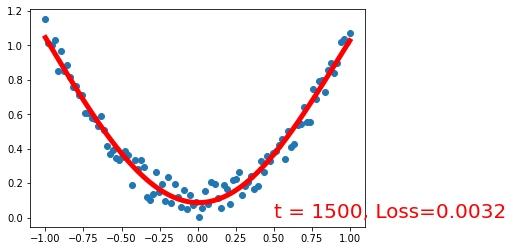

In [2]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(n_feature, n_hidden)
        self.active = torch.nn.Sigmoid()
        self.linear2 = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        y_pred = self.linear2(self.active(self.linear1(x)))
        return y_pred
    
net = Net(n_feature=1, n_hidden=20, n_output=1)     
print(net)  
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  

plt.ion()   
for t in range(1501):
    prediction = net(x)     
    loss = loss_func(prediction, y)     

    optimizer.zero_grad()   
    loss.backward()         
    optimizer.step()        

    if t % 500 == 0:
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
plt.show()